# Understanding Descriptive Statistics

Import the necessary libraries here:

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [11]:
def dice_roll(num_rolls = 10, num_sides = 6):
    rolls = [random.choice(range(1, num_sides + 1)) for _ in range(num_rolls)]
    df = pd.DataFrame({'Roll': rolls})
    return df


dice_df = dice_roll(num_rolls = 10, num_sides = 6)
dice_df

,Roll
0,1
1,1
2,5
3,4
4,5
5,5
6,4
7,6
8,1
9,6


#### 2.- Plot the results sorted by value.

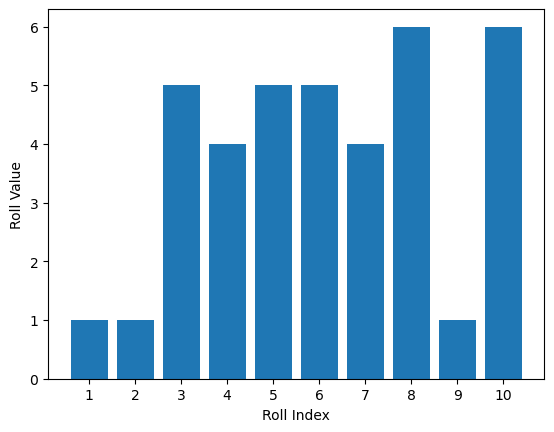

In [20]:
sorted_dice = dice_df.sort_values(by = "Roll", ascending = False)

plt.bar(sorted_dice.index, sorted_dice["Roll"])

plt.xlabel("Roll Index")
plt.ylabel("Roll Value")

plt.xticks(sorted_dice.index, sorted_dice.index + 1)

plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

5    3
1    3
6    2
4    2
Name: Roll, dtype: int64


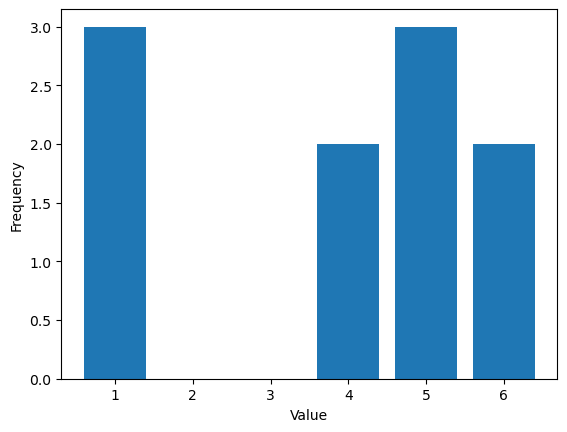

In [94]:
freq_distribution = sorted_dice["Roll"].value_counts()
print(freq_distribution)

plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
"""
your comments here
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [31]:
def mean_dice(data):
    mean = data.sum()/len(data)
    return mean

mean_dice(dice_df["Roll"])

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [45]:
freq_distribution = dice_df["Roll"].value_counts()

sum_values = 0
total_count = 0

for value, count in freq_distribution.items():
    sum_values += value * count
    total_count += count

mean_value = sum_values / total_count

print("Frequency Distribution:")
print(freq_distribution)
print(f"The mean is {mean_value}")

Frequency Distribution:
1    3
5    3
4    2
6    2
Name: Roll, dtype: int64
The mean is 3.8


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [43]:
def median_dice(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
 
    if n % 2 == 1:
        median_index = n // 2
        median = sorted_data[median_index]
    else:
        upper_median_index = n // 2
        lower_median_index = upper_median_index - 1
        median = (sorted_data[lower_median_index] + sorted_data[upper_median_index]) / 2.0
    
    return median


median_dice = median_dice(dice_df["Roll"])

print(f"The median is {median_dice}")

The median is 4.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [41]:
def quartiles_dice(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    
    q1 = calculate_median(sorted_data[:n//2])
    q2 = calculate_median(sorted_data)
    q3 = calculate_median(sorted_data[n//2:]) if n % 2 == 0 else calculate_median(sorted_data[n//2 + 1:])
    
    return q1, q2, q3

q1, q2, q3 = quartiles_dice(dice_df["Roll"])

print(f"The first quartile is {q1}")
print(f"The second quartile is {q2}")
print(f"The third quartile is {q3}")

The first quartile is 1
The second quartile is 4.5
The third quartile is 5


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

C:\Users\carol\AppData\Local\Temp\ipykernel_15912\3273671583.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sorted_values)


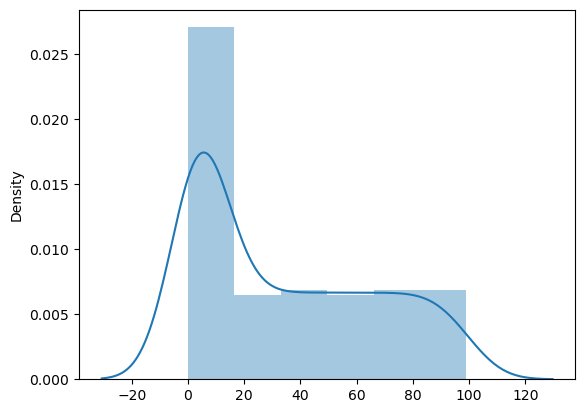

In [53]:
data = pd.read_csv("roll_the_dice_hundred.csv")

sorted_values = data.sort_values(by = "value", ascending = False)

sns.distplot(sorted_values)
plt.show()

In [ ]:
"""
your comments here
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [56]:
data.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [59]:
def mean_dice(data):
    mean = data.sum()/len(data)
    return mean

mean_dice(data["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


6    23
4    22
2    17
3    14
1    12
5    12
Name: value, dtype: int64


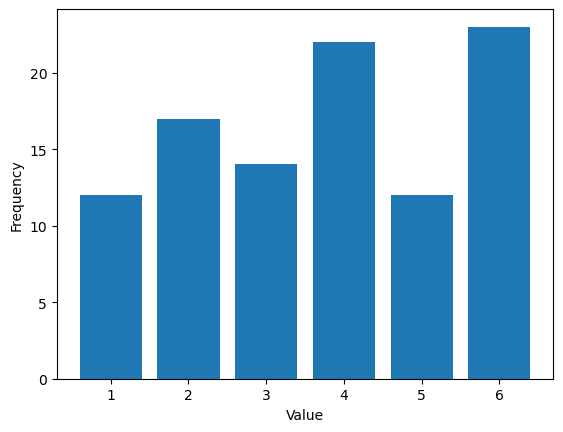

In [77]:
freq_distribution = data["value"].value_counts()
print(freq_distribution)

plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

(array([12.,  0., 17.,  0., 14.,  0., 22.,  0., 12., 23.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

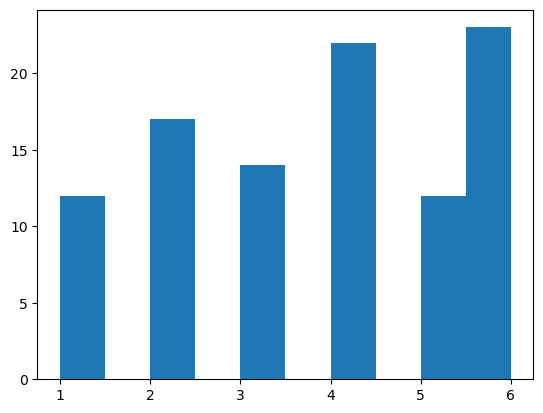

In [62]:
plt.hist(data["value"])

In [ ]:
"""
your comments here
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

1    175
3    175
4    168
2    167
6    166
5    149
Name: value, dtype: int64


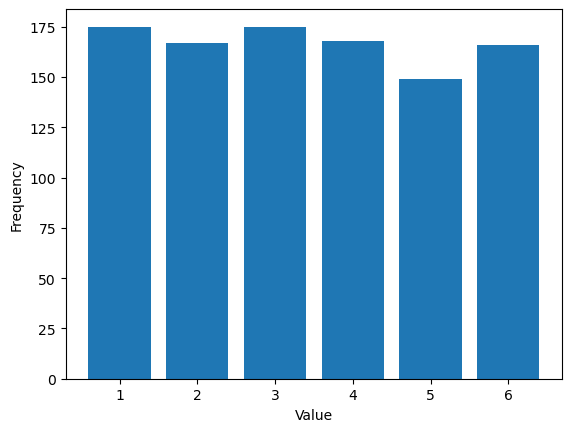

In [79]:
another_data = pd.read_csv("roll_the_dice_thousand.csv")

freq_distribution = another_data["value"].value_counts()
print(freq_distribution)

plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
"""
It changed because there are more values
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

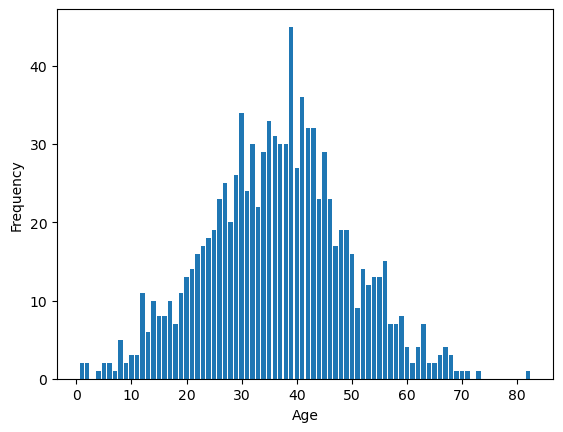

In [81]:
age = pd.read_csv("ages_population.csv")

freq_distribution = age["observation"].value_counts()

plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [83]:
mean = age["observation"].mean()
print(f"The mean is {mean}")

std_dev = age["observation"].std()
print(f"The standard deviation is {std_dev}")

The mean is 36.56
The standard deviation is 12.816499625976762


In [ ]:
"""
your comments here
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

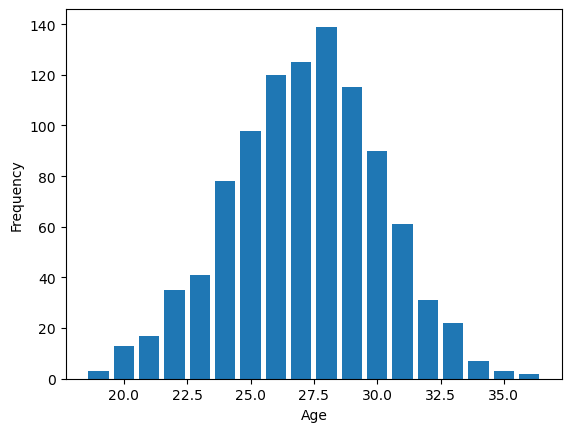

In [84]:
age_pop = pd.read_csv("ages_population2.csv")

freq_distribution = age_pop["observation"].value_counts()

plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [86]:
mean = age_pop["observation"].mean()
print(f"The mean is {mean}")

std_dev = age_pop["observation"].std()
print(f"The standard deviation is {std_dev}")

The mean is 27.155
The standard deviation is 2.969813932689186


In [ ]:
"""
your comments here
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

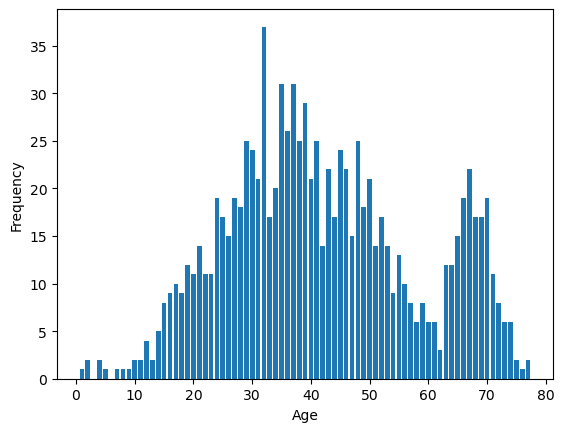

In [87]:
age_pop_3 = pd.read_csv("ages_population3.csv")

freq_distribution = age_pop_3["observation"].value_counts()

plt.bar(freq_distribution.index, freq_distribution.values)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [89]:
mean = age_pop_3["observation"].mean()
print(f"The mean is {mean}")

std_dev = age_pop_3["observation"].std()
print(f"The standard deviation is {std_dev}")

The mean is 41.989
The standard deviation is 16.144705959865934


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [90]:
q1 = np.quantile(age_pop_3, 0.25)
print(f"the first quartile is {q1}")

q2 = np.quantile(age_pop_3, 0.50)
print(f"the second quartile is {q2}")

q3 = np.quantile(age_pop_3, 0.75)
print(f"the third quartile is {q3}")

the first quartile is 30.0
the second quartile is 40.0
the third quartile is 53.0


In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [91]:
#Interquartile Range
iqr = q3 - q1
iqr

23.0

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""